<a href="https://colab.research.google.com/github/alonzojp/AI-Chess-Bot/blob/main/%5BAICB%5D_csv_to_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

!pip install chess
import chess
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df = pd.read_csv('drive/My Drive/chess_dataset.csv', index_col = 0)

In [26]:
print(len(df))
df = df.dropna()
print(len(df))

2166132
2166131


                                              fen_notation  evaluation_value
0              rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR              20.0
1        rnbqk1nr/pp2p1bp/3p2p1/2pP1p2/2P5/2N2N2/PP2PPP...              64.0
2              2Rb2k1/3q1rpp/p3Q3/2N1p3/4P3/3Pp3/1P4PP/1K6               0.0
3        rnbqkb1r/ppp1pppp/5n2/3p4/3P1B2/8/PPP1PPPP/RN1...               0.0
4               2b1k3/pr5R/1p2pr2/5p2/2pP4/2P5/PP3PB1/R5K1             994.0
...                                                    ...               ...
2166126  r1bqkb1r/pp2pp1p/2n3pn/3pP3/3P1B2/2N5/PP3PPP/R...              75.0
2166127  r1bqk1nr/ppp2pbp/3p2p1/3Pp3/2PnP3/4BP2/PP2N1PP...              48.0
2166128       r4rk1/p1pb2pp/1bp5/2Npq3/8/2Q1B3/PPP3PP/R5K1             631.0
2166129         r4rk1/p1pb2pp/1bp5/2NpQ3/8/4B3/PPP3PP/R5K1             568.0
2166130                           4k3/2R5/3KP3/8/8/8/8/3r4               0.0

[2166131 rows x 2 columns]


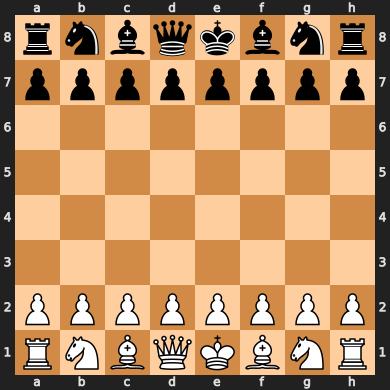

In [35]:
# print(df.sort_values('evaluation_value'))
print(df)
board = chess.Board('rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR')
display(board)

In [54]:
piece_to_number_array = ['zero', 'p', 'two', 'b', 'n', 'r', 'six', 'seven', 'q', 'k']

def piece_to_number(piece): # lower = black upper = white
  if(piece.islower()): # black piece = negative
    return -1 * piece_to_number_array.index(piece.lower())
  else:
    return piece_to_number_array.index(piece.lower())

def fen_to_array(fen):
  final_array = []

  fen_split = fen.split('/')
  for row in fen_split:
    for column in row:
      if(column.isdigit()):
        for i in range(0, int(column)):
          final_array.append(0)
      else:
        final_array.append(int(piece_to_number(column)))
  return final_array

len(fen_to_array('7r/pbrkq3/2p5/5p2/2pP1P2/2P4P/1P6/8'))

64

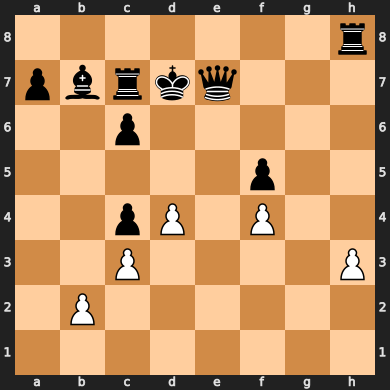

In [55]:
board = chess.Board('7r/pbrkq3/2p5/5p2/2pP1P2/2P4P/1P6/8')
display(board)

In [68]:
alpha = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
def ordered_notation():
  final = []
  counter = 8
  row_number = 8
  for i in range(0, 64):
    final.append(str(alpha[i % 8]) + str(row_number))
    counter -= 1
    if(counter == 0):
      counter = 8
      row_number -= 1
  return final

In [60]:
numeric_representations = []
for row in df['fen_notation']:
  numeric_representations.append(fen_to_array(row))
print(len(numeric_representations))

2166131


In [69]:
pieces_df = pd.DataFrame(numeric_representations, columns=ordered_notation())

In [74]:
pieces_df['evaluation_value'] = df['evaluation_value']

In [75]:
pieces_df

,a8,b8,c8,d8,e8,f8,g8,h8,a7,b7,...,h2,a1,b1,c1,d1,e1,f1,g1,h1,evaluation_value
0,-5,-4,-3,-8,-9,-3,-4,-5,-1,-1,...,1,5,4,3,8,9,3,4,5,20.0
1,-5,-4,-3,-8,-9,0,-4,-5,-1,-1,...,1,5,0,3,8,9,3,0,5,64.0
2,0,0,5,-3,0,0,-9,0,0,0,...,1,0,9,0,0,0,0,0,0,0.0
3,-5,-4,-3,-8,-9,-3,0,-5,-1,-1,...,1,5,4,0,8,9,3,4,5,0.0
4,0,0,-3,0,-9,0,0,0,-1,-5,...,0,5,0,0,0,0,0,9,0,994.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166126,-5,0,-3,-8,-9,-3,0,-5,-1,-1,...,1,5,0,0,8,9,3,4,5,75.0
2166127,-5,0,-3,-8,-9,0,-4,-5,-1,-1,...,1,5,4,0,8,9,3,0,5,48.0
2166128,-5,0,0,0,0,-5,-9,0,-1,0,...,1,5,0,0,0,0,0,9,0,631.0
2166129,-5,0,0,0,0,-5,-9,0,-1,0,...,1,5,0,0,0,0,0,9,0,568.0


In [76]:
pieces_df.to_csv('processed_chess_dataset.csv')